<a href="https://colab.research.google.com/github/NeevSabhani/Data-Science/blob/main/Unit9/NeevSabhUnit9Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
from torch import nn
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#**Unit 9 Project: Neural Networks and Penguins**

For this Unit 9 Project, I will be using a neural network to predict bill length in penguins using their flipper length. I did this bceause I had my eye on this dataset for a while, but I never had the opportunity to use it in the previous project, but using neural networks, I wanted to keep it simple, which allowed me to use this data set.

##**Data**

The data that I am using comes from Mr. Arredondo's github.

In [ ]:
url = '/content/penguins (1).csv'
penguins = pd.read_csv(url)
penguins


<Axes: xlabel='flipper_length', ylabel='bill_length'>

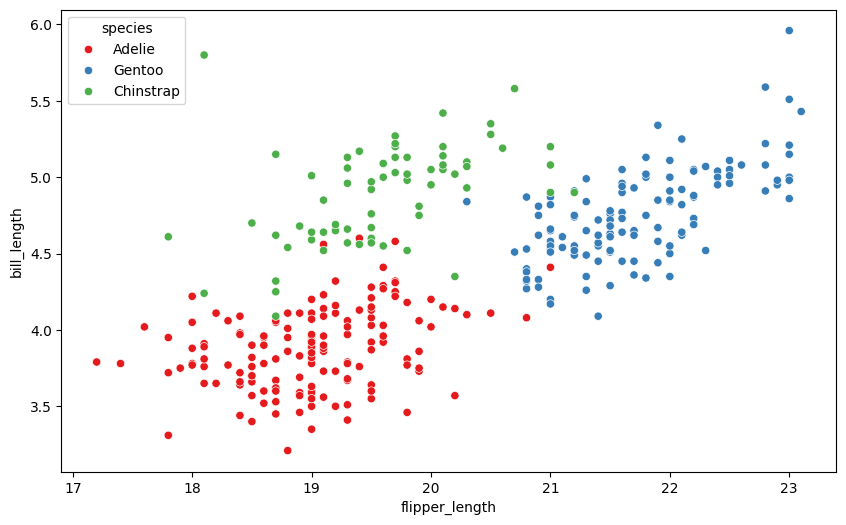

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=penguins, x='flipper_length', y='bill_length', hue='species', palette='Set1')


In [ ]:
chin = penguins[['flipper_length','bill_length']]
chin

,flipper_length,bill_length
0,18.1,3.91
1,18.6,3.95
2,19.5,4.03
4,19.3,3.67
5,19.0,3.93
...,...,...
339,20.7,5.58
340,20.2,4.35
341,19.3,4.96
342,21.0,5.08


##**My Model**

In [ ]:
matrix = chin.to_numpy()
tensor = torch.from_numpy(matrix)
print(tensor)
print(tensor.shape)

tensor([[18.1000,  3.9100],
        [18.6000,  3.9500],
        [19.5000,  4.0300],
        [19.3000,  3.6700],
        [19.0000,  3.9300],
        [18.1000,  3.8900],
        [19.5000,  3.9200],
        [19.3000,  3.4100],
        [19.0000,  4.2000],
        [18.6000,  3.7800],
        [18.0000,  3.7800],
        [18.2000,  4.1100],
        [19.1000,  3.8600],
        [19.8000,  3.4600],
        [18.5000,  3.6600],
        [19.5000,  3.8700],
        [19.7000,  4.2500],
        [18.4000,  3.4400],
        [19.4000,  4.6000],
        [17.4000,  3.7800],
        [18.0000,  3.7700],
        [18.9000,  3.5900],
        [18.5000,  3.8200],
        [18.0000,  3.8800],
        [18.7000,  3.5300],
        [18.3000,  4.0600],
        [18.7000,  4.0500],
        [17.2000,  3.7900],
        [18.0000,  4.0500],
        [17.8000,  3.9500],
        [17.8000,  3.7200],
        [18.8000,  3.9500],
        [18.4000,  4.0900],
        [19.5000,  3.6400],
        [19.6000,  3.9200],
        [19.0000,  3

In [ ]:
a = chin['bill_length'].to_numpy()
depth = torch.from_numpy(a)
b = chin["flipper_length"].to_numpy()
length = torch.from_numpy(b)

X = length.unsqueeze(dim=1)
y = depth.unsqueeze(dim=1)



scaler = StandardScaler()
length_scaled = scaler.fit_transform(
    length.reshape(-1, 1)
    )


X_train, X_test, y_train, y_test = train_test_split(
    length_scaled, depth, test_size=0.2,
)


X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

<ipython-input-78-3d48fdbdd6ad>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32)
<ipython-input-78-3d48fdbdd6ad>:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.float32)


In [ ]:
model_1 = nn.Sequential(
    nn.Linear(in_features=1, out_features=100),
    nn.ReLU(),
    nn.Linear(in_features=100, out_features=20),
    nn.ReLU(),
    nn.Linear(in_features=20, out_features=1)
)

In [ ]:
loss_fn = nn.MSELoss()


optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [ ]:
X_train = X_train.float()
X_test = X_test.float()
y_train = y_train.float()
y_test = y_test.float()


model_1 = model_1.float()

In [ ]:
epochs = 10000
for epoch in range(epochs):
    model_1.train()
    y_pred = model_1(X_train)

    loss = loss_fn(y_pred.squeeze(), y_train)


    optimizer.zero_grad()


    loss.backward()


    optimizer.step()


    model_1.eval()
    with torch.inference_mode():

      test_pred = model_1(X_test)

      test_loss = loss_fn(test_pred, y_test)


    if epoch % 200 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")


Epoch: 0 | Train loss: 21.84609, Test loss: 17.25617


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([69])) that is different to the input size (torch.Size([69, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 200 | Train loss: 0.14885, Test loss: 0.41144
Epoch: 400 | Train loss: 0.14662, Test loss: 0.41516
Epoch: 600 | Train loss: 0.14545, Test loss: 0.41552
Epoch: 800 | Train loss: 0.14469, Test loss: 0.41590
Epoch: 1000 | Train loss: 0.14418, Test loss: 0.41628
Epoch: 1200 | Train loss: 0.14383, Test loss: 0.41652
Epoch: 1400 | Train loss: 0.14359, Test loss: 0.41682
Epoch: 1600 | Train loss: 0.14341, Test loss: 0.41702
Epoch: 1800 | Train loss: 0.14327, Test loss: 0.41721
Epoch: 2000 | Train loss: 0.14315, Test loss: 0.41724
Epoch: 2200 | Train loss: 0.14304, Test loss: 0.41732
Epoch: 2400 | Train loss: 0.14294, Test loss: 0.41733
Epoch: 2600 | Train loss: 0.14286, Test loss: 0.41735
Epoch: 2800 | Train loss: 0.14278, Test loss: 0.41744
Epoch: 3000 | Train loss: 0.14271, Test loss: 0.41738
Epoch: 3200 | Train loss: 0.14264, Test loss: 0.41739
Epoch: 3400 | Train loss: 0.14257, Test loss: 0.41732
Epoch: 3600 | Train loss: 0.14251, Test loss: 0.41727
Epoch: 3800 | Train loss: 0.1424

In [ ]:
model_1.eval()
with torch.inference_mode():
    y_preds = model_1(X_test)

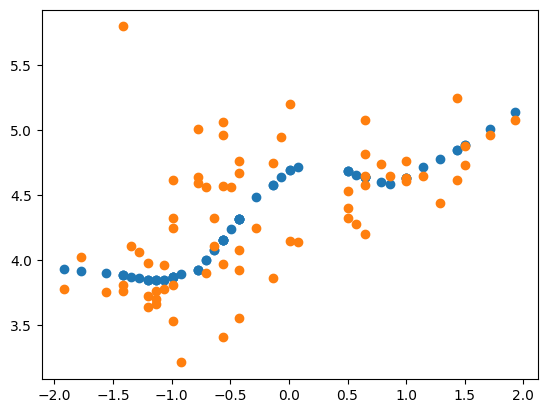

In [ ]:
plt.scatter(X_test.detach().numpy(),y_preds.detach().numpy())
plt.scatter(X_test.detach().numpy(),y_test.detach().numpy())

##**Conclusion**

The model fits the data quite well, capturing the overall upward trend between flipper length and bill length. Although there are some scattered data points that the model doesn’t perfectly align with—likely due to species differences—it still follows the general shape of the dataset. This result matches real-world expectations, as larger penguins tend to have both longer flippers and longer bills. So while the model simplifies a complex, multi-species relationship, it successfully learns the key pattern we would expect to see in nature.